In [10]:
import numpy as np
import heartpy as hp
import matplotlib.pyplot as plt

In [6]:
rhythm = np.load('test/rhythm.npy')
qa_label = np.load('test/qa_label.npy')
signal = np.load('test/signal.npy')
#parameters = np.load('test/parameters.npy')

In [4]:
print(rhythm.shape)
print(rhythm)

(17617, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [27]:
print(signal.shape)
print(signal)

(17617, 800, 1)
[[[0.47727461]
  [0.45973649]
  [0.39588511]
  ...
  [0.39320055]
  [0.39681605]
  [0.38496374]]

 [[0.40190864]
  [0.42905028]
  [0.43905214]
  ...
  [0.36904837]
  [0.37202321]
  [0.37207943]]

 [[0.45182789]
  [0.40260344]
  [0.43474474]
  ...
  [0.45310649]
  [0.47854183]
  [0.53227981]]

 ...

 [[0.5079831 ]
  [0.45244485]
  [0.53056706]
  ...
  [0.48513183]
  [0.49961599]
  [0.5675119 ]]

 [[0.83733314]
  [0.93675035]
  [0.81186599]
  ...
  [0.56884986]
  [0.56160995]
  [0.70938893]]

 [[0.59353895]
  [0.63130634]
  [0.55246836]
  ...
  [0.52534434]
  [0.50477869]
  [0.48250432]]]


In [8]:
print(qa_label.shape)
print(qa_label)

(17617, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [46]:
for i in range(qa_label.shape[0]):
    if(qa_label[i][0]==1):
        print(i)
        break

0


In [47]:
test_data = signal[0]
test_data = test_data.reshape(-1)
print(test_data.shape)

(800,)


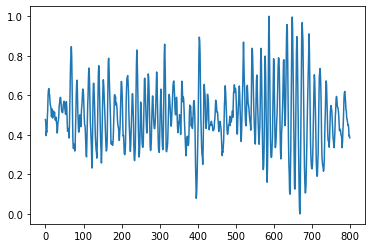

In [48]:
plt.plot(test_data)
plt.show()

In [49]:
wd, m = hp.process(test_data, sample_rate = 32.0)

C:\Python38\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


bpm: 144.775583
ibi: 414.434524
sdnn: 108.480510
sdsd: 111.743400
rmssd: 138.878038
pnn20: 0.833333
pnn50: 0.472222
hr_mad: 62.500000
sd1: 98.199684
sd2: 96.011418
s: 29619.849450
sd1/sd2: 1.022792
breathingrate: 0.172513


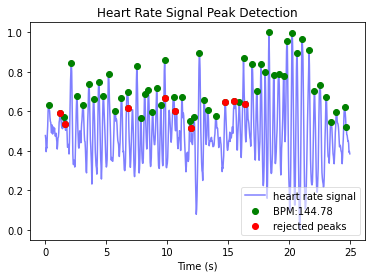

In [50]:
hp.plotter(wd, m)
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [51]:
print(wd['binary_peaklist'])
ratio = np.count_nonzero(wd['binary_peaklist']==1)/(len(wd['binary_peaklist']))
print(ratio)

[1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.85


In [58]:
poor_ratio = []
rejected = 0
accepted = 0
for i in range(qa_label.shape[0]):
    if(qa_label[i][0]==1):
        test_data = signal[i]
        test_data = test_data.reshape(-1)
        try:
            wd, m = hp.process(test_data, sample_rate = 32.0)
            ratio = np.count_nonzero(wd['binary_peaklist']==1)/(len(wd['binary_peaklist']))
            print(ratio)
            poor_ratio.append(ratio)
            accepted += 1
        except:
            poor_ratio.append(0.00)
            rejected = rejected + 1
print(rejected)

0.85
0.6296296296296297
0.7586206896551724
0.7619047619047619
0.8769230769230769
0.8135593220338984
0.7627118644067796
0.62
0.8333333333333334
0.8524590163934426
0.8387096774193549
0.90625
0.8709677419354839
0.8823529411764706

C:\Python38\lib\site-packages\scipy\interpolate\fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)



0.8870967741935484
0.8823529411764706
0.875
0.8275862068965517
0.803030303030303
0.8484848484848485
0.9333333333333333
0.7941176470588235
0.8125
0.9014084507042254
0.7076923076923077
0.8783783783783784
0.6153846153846154
0.7534246575342466
0.6615384615384615
0.918918918918919
0.7397260273972602
0.6923076923076923
0.9054054054054054
0.6984126984126984
0.6119402985074627
0.6153846153846154
0.7575757575757576
0.5490196078431373
0.543859649122807
0.4482758620689655
0.6153846153846154
0.7142857142857143
0.7142857142857143
0.8727272727272727
0.8627450980392157
0.7272727272727273
0.8676470588235294
0.8333333333333334
0.7704918032786885
0.8125
0.8153846153846154
0.7794117647058824
0.9090909090909091
0.9411764705882353
0.6792452830188679
0.9154929577464789
0.7924528301886793
0.9538461538461539
0.8636363636363636
0.8461538461538461
0.92
0.6842105263157895
0.9152542372881356
0.7916666666666666
0.5172413793103449
0.6071428571428571
0.7727272727272727
0.6666666666666666
0.5098039215686274
0.509803

C:\Python38\lib\site-packages\numpy\ma\core.py:5215: RuntimeWarning: Mean of empty slice.
  result = super(MaskedArray, self).mean(axis=axis,
C:\Python38\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


0.8524590163934426
0.9375
0.9545454545454546
0.9032258064516129
0.8059701492537313
0.5818181818181818
0.8305084745762712
0.8307692307692308
0.847457627118644
0.8974358974358975
0.9047619047619048
0.7727272727272727
0.7045454545454546
0.85
0.9428571428571428
0.8372093023255814
0.9459459459459459
0.7391304347826086
0.746268656716418
0.6229508196721312
0.7543859649122807
0.8983050847457628
0.8783783783783784
0.7647058823529411
0.7419354838709677
0.875
0.859375
0.5277777777777778
0.7352941176470589
0.55
0.4857142857142857
0.7272727272727273
0.32432432432432434
0.42857142857142855
0.5384615384615384
0.48717948717948717
0.4594594594594595
0.4418604651162791
0.7352941176470589
0.5405405405405406
0.6571428571428571
0.5161290322580645
0.4864864864864865
0.4838709677419355
0.7096774193548387
0.5
0.5135135135135135
0.4878048780487805
0.5483870967741935
0.34375
0.3
0.6666666666666666
0.84375
0.7058823529411765
0.3684210526315789
0.3939393939393939
0.4827586206896552
0.4473684210526316
0.4680851063

C:\Python38\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,



0.42857142857142855
0.48484848484848486
0.36666666666666664
0.30303030303030304
0.4642857142857143
0.3235294117647059
0.391304347826087
0.3333333333333333
0.23529411764705882
0.3235294117647059
0.3333333333333333
0.45161290322580644
0.59375
0.16666666666666666
0.375
0.4857142857142857
0.7058823529411765
0.6585365853658537
0.6744186046511628
0.5952380952380952
0.5
0.6444444444444445
0.7674418604651163
0.6744186046511628
0.5581395348837209
0.5
0.4838709677419355
0.5365853658536586
0.23076923076923078
0.2608695652173913
0.35294117647058826
0.17647058823529413
0.4318181818181818
0.4878048780487805
0.5
0.48717948717948717
0.30434782608695654
0.4473684210526316
0.325
0.5909090909090909
0.40540540540540543
0.5185185185185185
0.375
0.2857142857142857
0.6285714285714286
0.20833333333333334
0.2631578947368421
0.21428571428571427
0.47368421052631576
0.5526315789473685
0.5454545454545454
0.4411764705882353
0.42857142857142855
0.23529411764705882
0.2857142857142857
0.3939393939393939
0.5
0.5526315

0.5714285714285714
0.575
0.5277777777777778
0.38095238095238093
0.4722222222222222
0.6285714285714286
0.696969696969697
0.6285714285714286
0.4473684210526316
0.6875
0.696969696969697
0.5714285714285714
0.46153846153846156
0.4857142857142857
0.6060606060606061
0.4473684210526316
0.5833333333333334
0.6190476190476191
0.782608695652174
0.575
0.5813953488372093
0.6304347826086957
0.7021276595744681
0.7291666666666666
0.6530612244897959
0.5576923076923077
0.5
0.717391304347826
0.4411764705882353
0.4230769230769231
0.5
0.6
0.6046511627906976
0.5306122448979592
0.5116279069767442
0.3548387096774194
0.43902439024390244
0.34146341463414637
0.65
0.65
0.6206896551724138
0.3939393939393939
0.5
0.32142857142857145
0.7435897435897436
0.6153846153846154
0.7631578947368421
0.8529411764705882
0.5121951219512195
0.5
0.29411764705882354
0.48717948717948717
0.39285714285714285
0.6904761904761905
0.40540540540540543
0.6410256410256411
0.5675675675675675
0.38095238095238093
0.375
0.32142857142857145
0.25
0.

0.4444444444444444
0.36666666666666664
0.28125
0.4594594594594595
0.25
0.5142857142857142
0.43243243243243246
0.40476190476190477
0.4
0.5
0.2
0.5277777777777778
0.4186046511627907
0.6590909090909091
0.6666666666666666
0.2413793103448276
0.38235294117647056
0.3870967741935484
0.4444444444444444
0.21739130434782608
0.5
0.36363636363636365
0.5
0.55
0.38461538461538464
0.4375
0.5263157894736842
0.36363636363636365
0.36363636363636365
0.3888888888888889
0.3
0.45454545454545453
0.3333333333333333
0.6857142857142857
0.4117647058823529
0.5384615384615384
0.3
0.46511627906976744
0.35
0.2857142857142857
0.4583333333333333
0.84
0.7843137254901961
0.6666666666666666
0.3181818181818182
0.5925925925925926
0.54
0.42105263157894735
0.17391304347826086
0.20833333333333334
0.5384615384615384
0.4444444444444444
0.24324324324324326
0.5
0.3888888888888889
0.6153846153846154
0.6486486486486487
0.35294117647058826
0.15789473684210525
0.28
0.3333333333333333
0.5652173913043478
0.42857142857142855
0.5238095238

0.28
0.5277777777777778
0.5
0.6285714285714286
0.45
0.4878048780487805
0.7272727272727273
0.8
0.5833333333333334
0.6486486486486487
0.5333333333333333
0.5714285714285714
0.7368421052631579
0.696969696969697
0.42424242424242425
0.7428571428571429
0.6470588235294118
0.7777777777777778
0.6666666666666666
0.6571428571428571
0.6176470588235294
0.42105263157894735
0.6764705882352942
0.5428571428571428
0.8888888888888888
0.5161290322580645
0.6363636363636364
0.5476190476190477
0.9583333333333334
0.9166666666666666
0.8703703703703703
0.8867924528301887
0.8653846153846154
0.96
0.8461538461538461
0.927536231884058
0.9473684210526315
0.47368421052631576
0.39285714285714285
0.42105263157894735
0.5
0.21052631578947367
0.5806451612903226
0.7666666666666667
0.7058823529411765
0.5555555555555556
0.5609756097560976
0.675
0.59375
0.6875
0.5833333333333334
0.6571428571428571
0.4
0.6666666666666666
0.6111111111111112
0.6857142857142857
0.5128205128205128
0.625
0.6
0.5263157894736842
0.5384615384615384
0.6

0.5294117647058824
0.5517241379310345
0.6842105263157895
0.6486486486486487
0.84375
0.6
0.8
0.6944444444444444
0.631578947368421
0.59375
0.5806451612903226
0.65625
0.5277777777777778
0.56
0.3448275862068966
0.6097560975609756
0.5238095238095238
0.4444444444444444
0.5227272727272727
0.8
0.34782608695652173
0.8181818181818182
0.7708333333333334
0.6545454545454545
0.6491228070175439
0.5901639344262295
0.8787878787878788
0.4888888888888889
0.42857142857142855
0.4318181818181818
0.25
0.6923076923076923
0.16
0.4117647058823529
0.38235294117647056
0.22727272727272727
0.3333333333333333
0.2777777777777778
0.5185185185185185
0.2222222222222222
0.2631578947368421
0.17857142857142858
0.2
0.27586206896551724
0.4827586206896552
0.4
0.10344827586206896
0.1875
0.3448275862068966
0.3225806451612903
0.23333333333333334
0.23076923076923078
0.4642857142857143
0.8695652173913043
0.4782608695652174
0.16666666666666666
0.3125
0.16129032258064516
0.2608695652173913
0.3235294117647059
0.2894736842105263
0.357

0.175
0.04878048780487805
0.15555555555555556
0.13953488372093023
0.3333333333333333
0.3181818181818182
0.22857142857142856
0.2926829268292683
0.23809523809523808
0.2222222222222222
0.17647058823529413
0.2903225806451613
0.14705882352941177
0.4230769230769231
0.41379310344827586
0.1951219512195122
0.45161290322580644
0.5
0.24242424242424243
0.25
0.17073170731707318
0.23684210526315788
0.24390243902439024
0.42105263157894735
0.2916666666666667
0.1111111111111111
0.37209302325581395
0.3541666666666667
0.20512820512820512
0.4791666666666667
0.3469387755102041
0.4
0.4222222222222222
0.17142857142857143
0.41304347826086957
0.2857142857142857
0.18181818181818182
0.9523809523809523
0.15789473684210525
0.2222222222222222
0.3157894736842105
0.17391304347826086
0.28125
0.18518518518518517
0.25
0.3235294117647059
0.2222222222222222
0.3333333333333333
0.3939393939393939
0.4666666666666667
0.17391304347826086
0.4117647058823529
0.41304347826086957
0.35714285714285715
0.25925925925925924
0.235294117

0.34
0.21739130434782608
0.391304347826087
0.2391304347826087
0.6727272727272727
0.8103448275862069
0.7962962962962963
0.78125
0.6458333333333334
0.3488372093023256
0.18181818181818182
0.35294117647058826
0.5
0.25
0.36363636363636365
0.5454545454545454
0.2553191489361702
0.3888888888888889
0.71875
0.8571428571428571
0.7777777777777778
0.7719298245614035
0.8088235294117647
0.7761194029850746
0.7384615384615385
0.7916666666666666
0.6379310344827587
0.863013698630137
0.8194444444444444
0.7123287671232876
0.6805555555555556
0.7424242424242424
0.6712328767123288
0.15625
0.6491228070175439
0.42
0.5932203389830508
0.4888888888888889
0.6451612903225806
0.6557377049180327
0.7543859649122807
0.6666666666666666
0.9130434782608695
0.9047619047619048
0.5
0.95
0.47058823529411764
0.42
0.45454545454545453
0.25
0.6666666666666666
0.42857142857142855
0.27906976744186046
0.2826086956521739
0.41304347826086957
0.46875
0.746031746031746
0.6222222222222222
0.47058823529411764
0.84375
0.8035714285714286
0.7

0.717391304347826
0.5853658536585366
0.4318181818181818
0.5769230769230769
0.4090909090909091
0.6938775510204082
0.6111111111111112
0.6382978723404256
0.625
0.5333333333333333
0.5531914893617021
0.125
0.2608695652173913
0.625
0.5714285714285714
0.5555555555555556
0.5714285714285714
0.68
0.5476190476190477
0.37777777777777777
0.40476190476190477
0.2857142857142857
0.5151515151515151
0.2631578947368421
0.27586206896551724
0.23333333333333334
0.34615384615384615
0.4
0.2777777777777778
0.10526315789473684
0.3888888888888889
0.48
0.2222222222222222
0.17647058823529413
0.5142857142857142
0.46153846153846156
0.6666666666666666
0.41025641025641024
0.36666666666666664
0.2962962962962963
0.3157894736842105
0.16666666666666666
0.2777777777777778
0.2857142857142857
0.32142857142857145
0.19047619047619047
0.4444444444444444
0.18181818181818182
0.3225806451612903
0.5
0.48
0.4642857142857143
0.15789473684210525
0.7083333333333334
0.2857142857142857
0.35294117647058826
0.19047619047619047
0.2142857142

0.425
0.375
0.6222222222222222
0.5454545454545454
0.6938775510204082
0.34375
0.5128205128205128
0.47619047619047616
0.82
0.6956521739130435
0.36363636363636365
0.5813953488372093
0.7391304347826086
0.6041666666666666
0.38095238095238093
0.4375
0.6
0.3076923076923077
0.40540540540540543
0.5
0.4791666666666667
0.5555555555555556
0.5
0.6730769230769231
0.4444444444444444
0.30434782608695654
0.4318181818181818
0.34210526315789475
0.574468085106383
0.47619047619047616
0.358974358974359
0.3684210526315789
0.41935483870967744
0.35135135135135137
0.5333333333333333
0.26666666666666666
0.2857142857142857
0.425
0.5238095238095238
0.43243243243243246
0.5897435897435898
0.5
0.45
0.6052631578947368
0.5652173913043478
0.4523809523809524
0.6530612244897959
0.6346153846153846
0.9661016949152542
0.8688524590163934
0.9666666666666667
0.9193548387096774
0.717391304347826
0.921875
0.2
0.21428571428571427
0.475
0.25
0.6774193548387096
0.7619047619047619
0.6956521739130435
0.26666666666666666
0.611111111111

0.6
0.5178571428571429
0.47058823529411764
0.7692307692307693
0.4909090909090909
0.48717948717948717
0.4897959183673469
0.15789473684210525
0.32
0.2
0.47058823529411764
0.34375
0.2631578947368421
0.3684210526315789
0.34615384615384615
0.4166666666666667
0.10526315789473684
0.52
0.2777777777777778
0.30434782608695654
0.4074074074074074
0.47368421052631576
0.6923076923076923
0.6666666666666666
0.4782608695652174
0.39473684210526316
0.5555555555555556
0.19230769230769232
0.3888888888888889
0.375
0.42424242424242425
0.4
0.25
0.10526315789473684
0.1
0.3333333333333333
0.29411764705882354
0.4772727272727273
0.45161290322580644
0.43243243243243246
0.5714285714285714
0.7948717948717948
0.7586206896551724
0.7222222222222222
0.52
0.425
0.375
0.6964285714285714
0.5102040816326531
0.6
0.4745762711864407
0.8
0.52
0.9565217391304348
0.5227272727272727
0.45652173913043476
0.6923076923076923
0.525
1.0
0.6
0.5306122448979592
0.9583333333333334
0.3235294117647059
0.6046511627906976
0.5813953488372093
0.

0.5714285714285714
0.6724137931034483
0.6730769230769231
0.5
0.5609756097560976
0.9655172413793104
0.8857142857142857
0.6590909090909091
0.9178082191780822
0.6190476190476191
0.62
0.4117647058823529
0.7631578947368421
0.6666666666666666
0.7027027027027027
0.7142857142857143
0.8064516129032258
0.8103448275862069
0.391304347826087
0.36
0.34782608695652173
0.8421052631578947
0.2
0.6923076923076923
0.6944444444444444
0.8484848484848485
0.967741935483871
0.5882352941176471
0.7272727272727273
0.7941176470588235
0.8235294117647058
1.0
0.675
0.6842105263157895
0.65
0.5454545454545454
0.7804878048780488
0.6944444444444444
0.6829268292682927
0.7959183673469388
0.8367346938775511
0.7317073170731707
0.717391304347826
0.6415094339622641
0.7435897435897436
0.74
0.7959183673469388
0.9183673469387755
0.7142857142857143
0.8297872340425532
0.7307692307692307
0.7872340425531915
0.8723404255319149
0.7441860465116279
0.7543859649122807
0.8461538461538461
0.7884615384615384
0.5964912280701754
0.682926829268

0.4772727272727273
0.6363636363636364
0.5238095238095238
0.3888888888888889
0.8974358974358975
0.4
0.12121212121212122
0.2727272727272727
0.5609756097560976
0.13636363636363635
0.3448275862068966
0.35714285714285715
0.6829268292682927
0.6190476190476191
0.43478260869565216
0.2727272727272727
0.2903225806451613
0.3333333333333333
0.38095238095238093
0.2631578947368421
0.3
0.21739130434782608
0.3333333333333333
0.22857142857142856
0.42857142857142855
0.42857142857142855
0.37142857142857144
0.2692307692307692
0.3448275862068966
0.23529411764705882
0.2727272727272727
0.21052631578947367
0.1875
0.3333333333333333
0.25
0.5517241379310345
0.28125
0.4857142857142857
0.2727272727272727
0.6818181818181818
0.09523809523809523
0.35
0.35714285714285715
0.46153846153846156
0.5348837209302325
0.5
0.38461538461538464
0.4444444444444444
0.5128205128205128
0.4318181818181818
0.75
0.7115384615384616
0.5625
0.603448275862069
0.7288135593220338
0.8518518518518519
0.7307692307692307
0.5283018867924528
0.916

0.2
0.3157894736842105
0.1875
0.28
0.8478260869565217
0.7692307692307693
0.8064516129032258
0.8507462686567164
0.5147058823529411
0.4074074074074074
0.5238095238095238
0.41509433962264153
0.5306122448979592
0.4166666666666667
0.5217391304347826
0.7678571428571429
0.6222222222222222
0.5
0.17647058823529413
0.4090909090909091
0.15789473684210525
0.7166666666666667
0.65
0.6896551724137931
0.6545454545454545
0.7068965517241379
0.7857142857142857
0.3888888888888889
0.5849056603773585
0.5344827586206896
0.6774193548387096
0.6666666666666666
0.6666666666666666
0.7301587301587301
0.6440677966101694
0.7580645161290323
0.5813953488372093
0.6935483870967742
0.6271186440677966
0.640625
0.78125
0.7258064516129032
0.5714285714285714
0.6181818181818182
0.7611940298507462
0.7096774193548387
0.8225806451612904
0.55
0.6271186440677966
0.828125
0.7368421052631579
0.5614035087719298
0.6428571428571429
0.4642857142857143
0.8596491228070176
0.4827586206896552
0.5818181818181818
0.4883720930232558
0.76363636

0.14285714285714285
0.15789473684210525
0.08333333333333333
0.375
0.2727272727272727
0.47692307692307695
0.7066666666666667
0.35
0.6268656716417911
0.24
0.26666666666666666
0.3684210526315789
0.12
0.3076923076923077
0.23529411764705882
0.20833333333333334
0.6363636363636364
0.2894736842105263
0.16666666666666666
0.11764705882352941
0.2222222222222222
0.37037037037037035
0.5373134328358209
0.7681159420289855
0.3611111111111111
0.19047619047619047
0.29411764705882354
0.4074074074074074
0.6153846153846154
0.4
0.2972972972972973
0.5
0.5128205128205128
0.34146341463414637
0.3225806451612903
0.22727272727272727
0.35
0.36
0.3333333333333333
0.3939393939393939
0.5384615384615384
0.41304347826086957
0.6666666666666666
0.5272727272727272
0.4166666666666667
0.34146341463414637
0.5208333333333334
0.45714285714285713
0.2777777777777778
0.09523809523809523
0.2631578947368421
0.3611111111111111
0.8108108108108109
0.25
0.26666666666666666
0.3
0.34782608695652173
0.6666666666666666
0.375
0.310344827586

0.38235294117647056
0.5151515151515151
0.43902439024390244
0.30434782608695654
0.4444444444444444
0.3
0.5294117647058824
0.2647058823529412
0.32
0.32142857142857145
0.3
0.47058823529411764
0.45652173913043476
0.43478260869565216
0.42105263157894735
0.4594594594594595
0.5121951219512195
0.5675675675675675
0.5342465753424658
0.4117647058823529
0.25
0.36363636363636365
0.3333333333333333
0.3870967741935484
0.2962962962962963
0.3157894736842105
0.3142857142857143
0.46153846153846156
0.325
0.4827586206896552
0.38461538461538464
0.2857142857142857
0.2682926829268293
0.43902439024390244
0.5454545454545454
0.7777777777777778
0.4666666666666667
0.3684210526315789
0.5
0.30434782608695654
0.4418604651162791
0.46153846153846156
0.21739130434782608
0.5
0.2857142857142857
0.25925925925925924
0.18181818181818182
0.36666666666666664
0.3333333333333333
0.3409090909090909
0.6363636363636364
0.43478260869565216
0.425
0.5
0.7272727272727273
0.21052631578947367
0.40476190476190477
0.29411764705882354
0.5
0

0.5428571428571428
0.59375
0.42857142857142855
0.48148148148148145
0.47058823529411764
0.36363636363636365
0.4230769230769231
0.15789473684210525
0.7142857142857143
0.48936170212765956
0.40625
0.35294117647058826
0.5
0.6428571428571429
0.36363636363636365
0.5102040816326531
0.5306122448979592
0.3684210526315789
0.25
0.3684210526315789
0.45161290322580644
0.2608695652173913
0.6956521739130435
0.058823529411764705
0.6
0.39473684210526316
0.7551020408163265
0.3448275862068966
0.5833333333333334
0.4722222222222222
0.6666666666666666
0.6458333333333334
0.45161290322580644
0.3939393939393939
0.75
0.6875
0.7291666666666666
0.21739130434782608
0.25
0.29411764705882354
0.058823529411764705
0.6341463414634146
0.6190476190476191
0.46
0.40625
0.35294117647058826
0.4722222222222222
0.6415094339622641
0.6470588235294118
0.38235294117647056
0.5135135135135135
0.6666666666666666
0.1
0.71875
0.4583333333333333
0.37037037037037035
0.21052631578947367
0.4838709677419355
0.4
0.44
0.6730769230769231
0.2272

0.5675675675675675
0.47619047619047616
0.6029411764705882
0.5
0.6060606060606061
0.23684210526315788
0.38095238095238093
0.5942028985507246
0.6111111111111112
0.5172413793103449
0.16666666666666666
0.5283018867924528
0.9178082191780822
0.6515151515151515
0.5185185185185185
0.3953488372093023
0.6904761904761905
0.4117647058823529
0.6571428571428571
0.5428571428571428
0.5909090909090909
0.43478260869565216
0.5116279069767442
0.40476190476190477
0.4666666666666667
0.4146341463414634
0.28125
0.4
0.6
0.6136363636363636
0.6486486486486487
0.4418604651162791
0.4117647058823529
0.43902439024390244
0.23076923076923078
0.5869565217391305
0.627906976744186
0.35294117647058826
0.4375
0.6363636363636364
0.54
0.38636363636363635
0.6956521739130435
0.5581395348837209
0.5128205128205128
0.4782608695652174
0.4358974358974359
0.3953488372093023
0.7021276595744681
0.7209302325581395
0.6136363636363636
0.5238095238095238
0.6170212765957447
0.6530612244897959
0.5918367346938775
0.717391304347826
0.52941176

0.3783783783783784
0.5476190476190477
0.6046511627906976
0.5526315789473685
0.37209302325581395
0.525
0.5853658536585366
0.5753424657534246
0.4603174603174603
0.6944444444444444
0.6666666666666666
0.4426229508196721
0.6176470588235294
0.5588235294117647
0.6533333333333333
0.6712328767123288
0.704225352112676
0.625
0.5079365079365079
0.24242424242424243
0.4
0.46296296296296297
0.4807692307692308
0.6428571428571429
0.6833333333333333
0.40425531914893614
0.38461538461538464
0.7346938775510204
0.627906976744186
0.8604651162790697
0.525
0.4
0.3225806451612903
0.2608695652173913
0.5588235294117647
0.6545454545454545
0.6538461538461539
0.3235294117647059
0.55
0.7
0.4074074074074074
0.8043478260869565
0.5128205128205128
0.65
0.5
0.4594594594594595
0.45454545454545453
0.5128205128205128
0.48484848484848486
0.39473684210526316
0.6578947368421053
0.43902439024390244
0.3055555555555556
0.5952380952380952
0.3829787234042553
0.5932203389830508
0.5211267605633803
0.5909090909090909
0.8266666666666667

In [59]:
mod_ratio = []
rejected = 0
accepted = 0
for i in range(qa_label.shape[0]):
    if(qa_label[i][1]==1):
        test_data = signal[i]
        test_data = test_data.reshape(-1)
        try:
            wd, m = hp.process(test_data, sample_rate = 32.0)
            ratio = np.count_nonzero(wd['binary_peaklist']==1)/(len(wd['binary_peaklist']))
            print(ratio)
            mod_ratio.append(ratio)
            accepted = accepted + 1
        except:
            mod_ratio.append(0.00)
            rejected = rejected + 1
print(rejected)
print(accepted)

0.78125
0.7741935483870968
0.78125
0.7741935483870968
0.75
0.8275862068965517
0.8064516129032258
0.7333333333333333
0.8787878787878788
0.8666666666666667
0.4827586206896552
0.7352941176470589
0.8787878787878788
0.9411764705882353
0.5853658536585366
0.5952380952380952
0.5128205128205128
0.8333333333333334
0.8484848484848485
0.7666666666666667
0.6875
0.7931034482758621
0.4482758620689655
0.6206896551724138
0.7096774193548387
0.7586206896551724
0.34615384615384615
0.53125
0.6
0.90625
0.8461538461538461
0.6333333333333333
0.7
0.7647058823529411
0.5483870967741935
0.5
0.38235294117647056
0.9117647058823529
0.425
0.3333333333333333
0.15384615384615385
0.5476190476190477
0.4594594594594595
0.2
0.6111111111111112
0.5428571428571428
0.5428571428571428
0.7575757575757576
0.6666666666666666
0.5263157894736842
0.43243243243243246
0.42105263157894735
0.5454545454545454
0.38235294117647056
0.6451612903225806
0.4838709677419355
0.6388888888888888
0.6666666666666666
0.9411764705882353
0.73529411764705

0.6857142857142857
0.6578947368421053
0.7741935483870968
0.9375
1.0
0.8387096774193549
0.8484848484848485
0.8125
0.8125
0.84375
0.625
0.6060606060606061
0.7333333333333333
0.8709677419354839
0.7575757575757576
0.7272727272727273
0.7878787878787878
0.6857142857142857
0.8571428571428571
0.8
0.6875
0.9166666666666666
0.3333333333333333
0.8076923076923077
0.9545454545454546
1.0
0.8571428571428571
0.46153846153846156
0.56
0.8181818181818182
0.782608695652174
0.9523809523809523
0.32142857142857145
0.5
0.56
0.3793103448275862
0.9090909090909091
0.8695652173913043
0.8260869565217391
0.19444444444444445
0.23529411764705882
0.5357142857142857
0.9523809523809523
1.0
0.23333333333333334
0.95
0.95
0.6153846153846154
0.4482758620689655
0.9523809523809523
0.18421052631578946
0.15
0.96
0.9523809523809523
0.9523809523809523
0.95
0.9523809523809523
0.95
0.41379310344827586
0.6538461538461539
0.56
0.72
0.7727272727272727
0.5384615384615384
0.8181818181818182
0.46153846153846156
0.95
0.7916666666666666
0.

0.41818181818181815
0.49122807017543857
0.45454545454545453
0.8275862068965517
0.4666666666666667
0.46875
0.5277777777777778
0.42857142857142855
0.925
0.4878048780487805
0.6904761904761905
0.75
0.39473684210526316
0.20588235294117646
0.4482758620689655
0.1
0.13513513513513514
0.13333333333333333
0.02564102564102564
0.15384615384615385
0.1951219512195122
0.075
0.15789473684210525
0.09375
0.8518518518518519
0.07142857142857142
0.3055555555555556
0.027777777777777776
0.17142857142857143
0.5172413793103449
0.05405405405405406
0.05128205128205128
0.05555555555555555
0.1891891891891892
0.16216216216216217
0.16666666666666666
0.9130434782608695
0.10256410256410256
0.09090909090909091
0.05714285714285714
0.9583333333333334
0.96
0.09090909090909091
0.0625
0.05405405405405406
0.030303030303030304
0.3333333333333333
0.34375
0.02857142857142857
0.08571428571428572
0.027777777777777776
0.875
0.7777777777777778
0.08823529411764706
0.125
0.875
0.5172413793103449
0.5161290322580645
0.02564102564102564

1.0
1.0
0.6666666666666666
0.9565217391304348
0.9565217391304348
0.6666666666666666
0.9777777777777777
0.3611111111111111
1.0
0.7708333333333334
0.35135135135135137
0.9565217391304348
0.5121951219512195
0.9130434782608695
0.5151515151515151
0.4594594594594595
0.8043478260869565
0.6153846153846154
0.975
0.23076923076923078
0.47368421052631576
0.7659574468085106
0.9583333333333334
1.0
0.9545454545454546
1.0
0.9545454545454546
1.0
1.0
0.7441860465116279
0.9130434782608695
0.9565217391304348
0.7380952380952381
0.7906976744186046
0.5476190476190477
0.9545454545454546
0.5384615384615384
0.7804878048780488
0.9565217391304348
1.0
0.48717948717948717
0.5882352941176471
0.7307692307692307
0.9565217391304348
0.813953488372093
0.9069767441860465
0.3684210526315789
0.9090909090909091
0.9565217391304348
0.9565217391304348
0.7619047619047619
0.36363636363636365
0.6296296296296297
0.5
0.7948717948717948
0.8
0.7692307692307693
1.0
0.975
0.42857142857142855
0.58
0.7021276595744681
0.75
0.679245283018867

In [56]:
excellent_ratio = []
rejected = 0
accepted = 0
for i in range(qa_label.shape[0]):
    if(qa_label[i][2]==1):
        test_data = signal[i]
        test_data = test_data.reshape(-1)
        try:
            wd, m = hp.process(test_data, sample_rate = 32.0)
            ratio = np.count_nonzero(wd['binary_peaklist']==1)/(len(wd['binary_peaklist']))
            print(ratio)
            excellent_ratio.append(ratio)
            accepted = accepted + 1
        except:
            rejected = rejected + 1
print(rejected)
print(accepted)

0.9090909090909091
0.8387096774193549
1.0
0.8181818181818182
0.7941176470588235
1.0
0.7941176470588235
0.967741935483871
1.0
0.967741935483871
1.0
0.9666666666666667
0.6571428571428571
0.96875
1.0
1.0
0.9
0.967741935483871
1.0
0.9354838709677419
1.0
0.9666666666666667
1.0
1.0
0.78125
1.0
0.9032258064516129
0.8
0.8620689655172413
0.9310344827586207
0.9655172413793104
1.0
0.9655172413793104
1.0
0.9655172413793104
0.9
0.9032258064516129
1.0
0.9310344827586207
1.0
0.9666666666666667
0.9666666666666667
1.0
0.9
1.0
0.78125
0.8125
1.0
0.896551724137931
1.0
0.9333333333333333
0.8125
0.896551724137931
0.9032258064516129
0.9354838709677419
0.9
1.0
0.967741935483871
0.967741935483871
0.967741935483871
0.8333333333333334
0.9
0.967741935483871
0.896551724137931
0.9354838709677419
0.9666666666666667
0.8387096774193549
0.9333333333333333
0.9310344827586207
0.9333333333333333
1.0
0.9642857142857143
0.9655172413793104
1.0
0.9666666666666667
0.8928571428571429
0.8
0.9393939393939394
0.7419354838709677
0

0.90625
0.7058823529411765
1.0
0.9705882352941176
0.9705882352941176
0.9714285714285714
0.5238095238095238
0.6904761904761905
0.7142857142857143
0.9166666666666666
0.9722222222222222
0.8823529411764706
0.875
0.8787878787878788
1.0
0.7714285714285715
0.6111111111111112
0.8285714285714286
0.90625
0.90625
0.9
0.8387096774193549
0.8387096774193549
0.9142857142857143
0.7692307692307693
0.9393939393939394
0.9090909090909091
0.9411764705882353
1.0
0.967741935483871
0.96875
1.0
0.9666666666666667
0.96875
0.875
0.9090909090909091
0.9393939393939394
0.96875
0.9666666666666667
0.96875
0.96875
0.9032258064516129
0.9
1.0
1.0
1.0
0.8
1.0
0.9655172413793104
1.0
0.7878787878787878
0.9354838709677419
0.8666666666666667
0.9333333333333333
0.9655172413793104
0.9310344827586207
0.9310344827586207
0.896551724137931
0.9655172413793104
1.0
0.972972972972973
0.8666666666666667
1.0
0.8857142857142857
0.9375
0.9696969696969697
0.9705882352941176
1.0
0.967741935483871
1.0
1.0
0.9666666666666667
1.0
1.0
1.0
0.967

0.9666666666666667
1.0
1.0
0.9655172413793104
1.0
0.9666666666666667
1.0
0.9655172413793104
0.9
0.967741935483871
1.0
0.9655172413793104
1.0
1.0
0.9666666666666667
1.0
0.9642857142857143
1.0
0.9
1.0
0.9666666666666667
1.0
1.0
1.0
1.0
0.9285714285714286
0.875
0.9
0.9655172413793104
0.9354838709677419
0.9375
1.0
0.9
1.0
0.9333333333333333
1.0
1.0
0.9333333333333333
1.0
0.8181818181818182
0.9411764705882353
0.9523809523809523
0.9230769230769231
1.0
1.0
0.967741935483871
1.0
0.9393939393939394
1.0
1.0
1.0
0.9655172413793104
0.9696969696969697
1.0
0.967741935483871
0.96875
0.9642857142857143
0.9310344827586207
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9333333333333333
1.0
1.0
0.9666666666666667
1.0
1.0
1.0
0.9655172413793104
1.0
0.9666666666666667
1.0
0.9655172413793104
0.9285714285714286
0.967741935483871
1.0
0.9655172413793104
1.0
1.0
0.9666666666666667
1.0
0.9642857142857143
1.0
0.9655172413793104
1.0
0.9666666666666667
1.0
1.0
1.0
1.0
0.9285714285714286
0.7878787878787878
0.9032258064516129
0.84375

0.36363636363636365
1.0
0.11428571428571428
0.25
0.18181818181818182
0.3448275862068966
0.5357142857142857
0.88
0.9285714285714286
0.3333333333333333
0.3333333333333333
0.6428571428571429
0.4838709677419355
0.10256410256410256
0.08333333333333333
0.07894736842105263
0.24324324324324326
0.05405405405405406
0.05
0.7857142857142857
0.2222222222222222
0.9629629629629629
0.7
0.3055555555555556
0.6904761904761905
0.6666666666666666
0.9555555555555556
0.7608695652173914
0.8372093023255814
0.6976744186046512
0.7209302325581395
0.813953488372093
0.5
0.6976744186046512
0.7906976744186046
0.6976744186046512
0.6904761904761905
0.7380952380952381
0.55
0.5714285714285714
0.6428571428571429
0.7209302325581395
0.8181818181818182
0.7555555555555555
0.7209302325581395
0.75
0.7857142857142857
0.6170212765957447
0.9565217391304348
0.9024390243902439
0.8604651162790697
0.7906976744186046
0.6744186046511628
0.5681818181818182
1.0
0.775
0.9545454545454546
0.8372093023255814
0.7446808510638298
0.4736842105263

0.9666666666666667
0.8387096774193549
0.967741935483871
1.0
0.9130434782608695
0.875
0.875
0.8260869565217391
0.9130434782608695
0.68
0.9523809523809523
1.0
0.9130434782608695
1.0
0.9545454545454546
0.4523809523809524
0.46511627906976744
0.9130434782608695
1.0
1.0
0.6136363636363636
0.6590909090909091
0.88
0.8260869565217391
0.358974358974359
0.9130434782608695
0.9565217391304348
0.7272727272727273
0.75
0.96
0.7209302325581395
0.7872340425531915
0.7407407407407407
0.9130434782608695
0.9354838709677419
0.8571428571428571
0.8235294117647058
0.868421052631579
0.5952380952380952
0.9583333333333334
0.875
0.8333333333333334
0.875
0.5952380952380952
1.0
0.525
1.0
0.425
0.6976744186046512
0.9130434782608695
0.9130434782608695
1.0
0.3170731707317073
0.75
0.8461538461538461
1.0
0.3953488372093023
0.2926829268292683
0.9583333333333334
0.7333333333333333
0.8181818181818182
0.9583333333333334
0.7333333333333333
0.9090909090909091
0.7241379310344828
0.7692307692307693
0.5609756097560976
0.9375
0.939

0.8461538461538461
0.9473684210526315
0.7692307692307693
0.8974358974358975
0.6444444444444445
0.8648648648648649
0.8333333333333334
0.7948717948717948
0.7631578947368421
0.8292682926829268
0.8717948717948718
0.8205128205128205
0.8536585365853658
0.8780487804878049
0.6842105263157895
0.7567567567567568
0.918918918918919
0.9210526315789473
0.775
0.7368421052631579
0.7435897435897436
0.95
0.8809523809523809
0.8974358974358975
0.8648648648648649
0.9487179487179487
0.90625
0.8461538461538461
0.8947368421052632
0.918918918918919
0.825
0.8108108108108109
0.9736842105263158
0.8888888888888888
0.7837837837837838
0.7948717948717948
0.8
0.8421052631578947
0.8260869565217391
0.7894736842105263
0.8108108108108109
0.7692307692307693
0.8292682926829268
0.8055555555555556
0.8292682926829268
0.7872340425531915
0.8
0.875
0.8333333333333334
0.8333333333333334
0.85
0.8918918918918919
0.7948717948717948
0.8378378378378378
0.8157894736842105
0.8974358974358975
0.7692307692307693
0.7297297297297297
0.717948

In [57]:
sum_val = 0
max_val = 0.0
min_val = 1.0
for i in range(len(excellent_ratio)):
    sum_val += excellent_ratio[i]
    if excellent_ratio[i]<min_val:
        min_val = excellent_ratio[i]
    if excellent_ratio[i]>max_val:
        max_val = excellent_ratio[i]
excellent_avg_ratio = sum_val / len(excellent_ratio)
print('Avg (Excellent): ', excellent_avg_ratio)
print('Range: (', min_val, ', ', max_val, ')')

Avg (Excellent):  0.8578932207537825
Range: ( 0.023809523809523808 ,  1.0 )


In [63]:
sum_val = 0
max_val = 0.0
min_val = 1.0
for i in range(len(mod_ratio)):
    sum_val += mod_ratio[i]
    if mod_ratio[i]<min_val:
        min_val = mod_ratio[i]
    if mod_ratio[i]>max_val:
        max_val = mod_ratio[i]
mod_avg_ratio = sum_val / len(mod_ratio)
print('Avg (Moderate): ', mod_avg_ratio)
print('Range: (', min_val, ', ', max_val, ')')

Avg (Moderate):  0.6237407343790585
Range: ( 0.0 ,  1.0 )


In [62]:
sum_val = 0
max_val = 0.0
min_val = 1.0
for i in range(len(poor_ratio)):
    sum_val += poor_ratio[i]
    if poor_ratio[i]<min_val:
        min_val = poor_ratio[i]
    if poor_ratio[i]>max_val:
        max_val = poor_ratio[i]
poor_avg_ratio = sum_val / len(poor_ratio)
print('Avg (Poor): ', poor_avg_ratio)
print('Range: (', min_val, ', ', max_val, ')')

Avg (Poor):  0.33810137967723586
Range: ( 0.0 ,  1.0 )
